### Parte 4: Revisión de casos

El objetivo de este fichero es intentar caracterizar cada uno de los casos del conjunto de validación. Para ello, comenzaremos mostrando estadísticos básicos, matriz de correlaciones respecto de las componentes vectoriales del viento, y luego algunos gráficos de caja para revisar la distribución de las variables. 


#### 4.1 Estadísticos básicos por mapa

In [60]:
import pandas as pd 
import numpy as np 


def mostrar_stats(var_name): 

    var_names  =["u10", "v10", "hgt", "xland", "pblh", "psfc", "th2", "t2"]
    fechas_val =["2019_08_23", "2022_11_25", "2015_10_21", "2019_11_20", 
                 "2019_11_06", "2020_11_13","2022_07_16", "2022_08_10"]
    stats_names= ["min", "max", "mediana", "mean", "std", "var"]
    info       = pd.DataFrame(index=fechas_val, columns=stats_names)

    if var_name not in var_names: 
        return print("Nombre de la variable no encontrado")
    
    else: 
        var_array = np.load(f"../../parches_winscp/bicubic_32_32/190824_16_va/raw/{var_name}_input_raw_190824_16_va.npy")[:,:,:,0]

    for i in range(8): 
        var_array_i = var_array[i*(115*156):(115*156)*(i+1)]

        media_global    = np.mean(var_array_i)
        std_global      = np.std(var_array_i)
        varianza_global = np.var(var_array_i)
        med_global      = np.median(var_array_i)
        min_global      = np.min(var_array_i)
        max_global      = np.max(var_array_i)

        info.loc[ fechas_val[i]] = [min_global, max_global, med_global, media_global, std_global, varianza_global]

    print(f"Estadísticos para la variable {var_name}")
    return info 

mostrar_stats("v10")

Estadísticos para la variable v10


,min,max,mediana,mean,std,var
2019_08_23,-25.444092,9.894619,-4.881279,-5.542253,4.221656,17.82238
2022_11_25,-8.648632,14.007813,2.839533,3.305979,3.682893,13.5637
2015_10_21,-12.538565,11.618812,-0.530413,-0.623765,3.752494,14.081213
2019_11_20,-16.481678,11.252048,-0.389,-0.510156,4.207402,17.702232
2019_11_06,-12.557677,12.13087,3.18663,3.014009,3.859845,14.898406
2020_11_13,-11.765018,13.39246,2.33354,2.185193,3.795496,14.405789
2022_07_16,-21.635998,14.802278,-4.296863,-4.552488,5.279343,27.871458
2022_08_10,-22.107195,9.235903,-4.977944,-5.469386,3.951645,15.615495


#### 4.2 Estadísticos por cuadrante: 

In [19]:
var_names  =["u10", "v10", "hgt", "xland", "pblh", "psfc", "th2", "t2"]
fechas_val =["2019_08_23", "2022_11_25", "2015_10_21", "2019_11_20", 
                 "2019_11_06", "2020_11_13","2022_07_16", "2022_08_10"]
stats_names= ["min", "max", "mediana", "mean", "std", "var"]
info       = pd.DataFrame(index=fechas_val, columns=stats_names)


var_array = np.load(f"../../parches_winscp/bicubic_32_32/190824_16_va/raw/{var_names[1]}_input_raw_190824_16_va.npy")[:,:,:,0]

array_156= [] 

for i in range(156): 
    casos= []
    var_array_i = var_array[i::156]

    for j in range(8): 
      
        var_array_j = var_array_i[115*j: 115*(j+1)]

        media_global    = np.mean(var_array_j)
        std_global      = np.std(var_array_j)
        varianza_global = np.var(var_array_j)

        casos.append( [media_global, std_global, varianza_global] ) 

    array_156.append(casos)


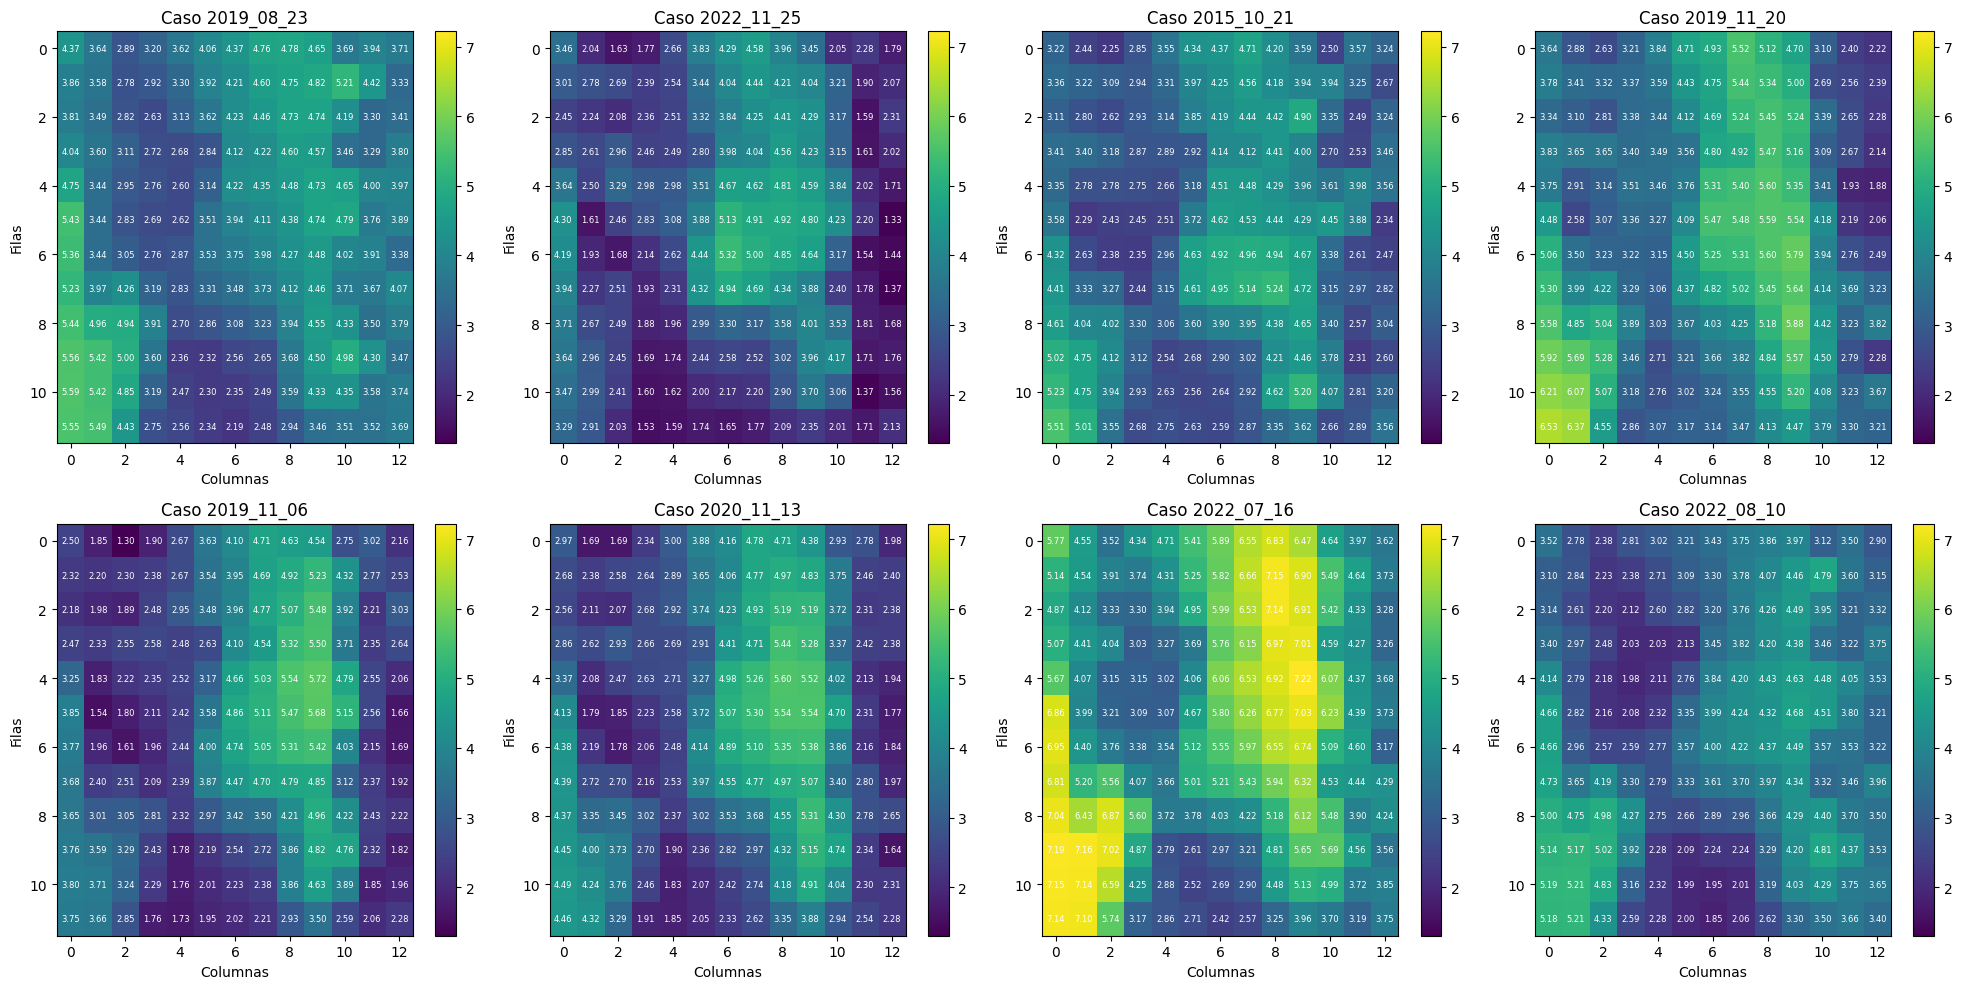

In [20]:
import matplotlib.pyplot as plt

# Paso 1: Generar datos de ejemplo (8 matrices de tamaño 12x13)
data_list = [  np.array([valor[i][1] for valor in array_156]).reshape((12, 13)) for i in range(8)]
titles = [f'Caso {fechas_val[i]}' for i in range(8)]


all_data = np.concatenate(data_list, axis=0)  
vmax = all_data.max()
vmin = all_data.min()

fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 filas y 4 columnas

# Paso 4: Crear cada mapa de calor con sus personalizaciones
for ax, data, title in zip(axes.flat, data_list, titles):
    im = ax.imshow(data, cmap='viridis', aspect='auto', vmin=vmin, vmax=vmax)
    ax.set_title(title)
    ax.set_xlabel('Columnas')
    ax.set_ylabel('Filas')
    
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            ax.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='white', fontsize=6)

    plt.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

#### 4.3 Matriz de correlación entre las variables

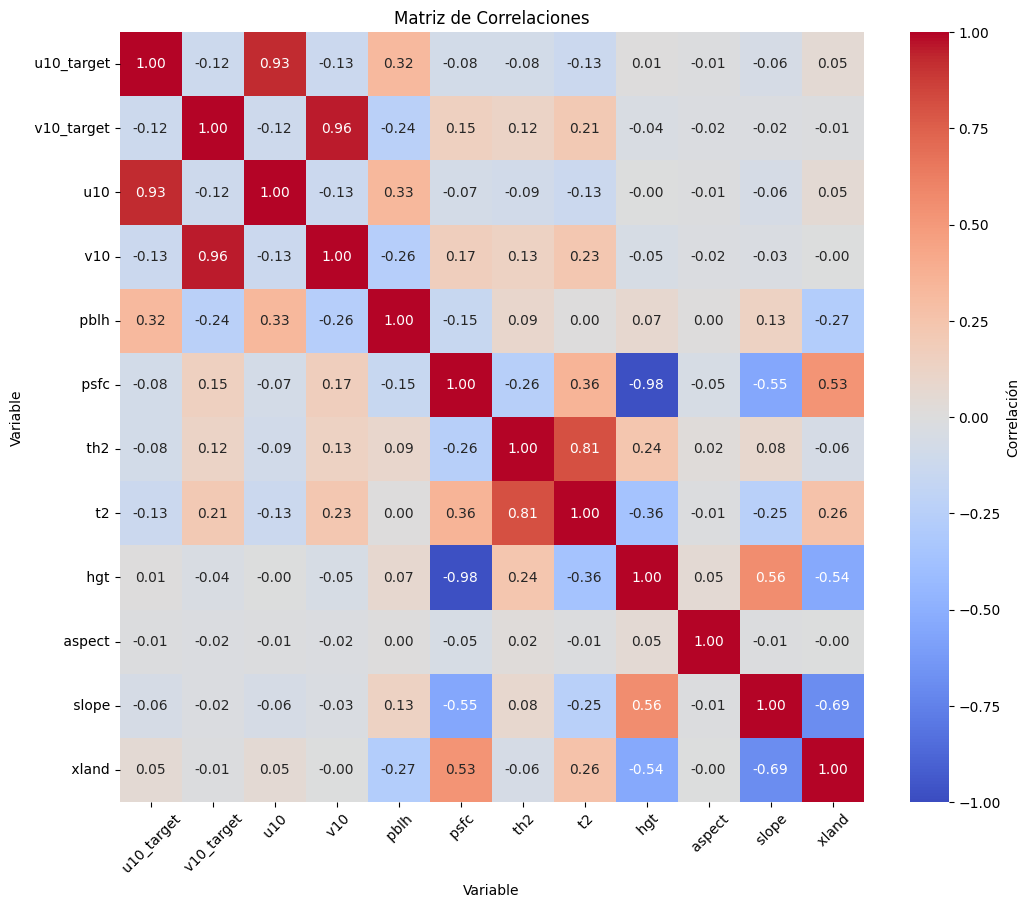

CPU times: user 7.54 s, sys: 52.1 s, total: 59.6 s
Wall time: 4min 20s


In [82]:
%%time 

import seaborn as sns

var_names  =["u10", "v10",  "pblh", "psfc", "th2", "t2", "hgt", "aspect", "slope", "xland",]


data_list = [ np.load(f"../../parches_winscp/bicubic_32_32/190824_16_va/raw/{var}_input_raw_190824_16_va.npy")[:,:,:,0] for var in var_names]

data_list = [ np.load(f"../../parches_winscp/bicubic_32_32/190824_16_va/raw/v10_target_raw_190824_16_va.npy")[:,:,:,0]] + data_list 
data_list = [ np.load(f"../../parches_winscp/bicubic_32_32/190824_16_va/raw/u10_target_raw_190824_16_va.npy")[:,:,:,0]] + data_list 

var_names = ["u10_target", "v10_target"] + var_names

flattened_data = [data.flatten() for data in data_list]

data_matrix = np.array(flattened_data)
correlation_matrix = np.corrcoef(data_matrix)

variable_names = [f' {var}' for var in var_names]  

# Paso 6: Graficar la matriz de correlaciones con etiquetas personalizadas
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, 
            cbar_kws={'label': 'Correlación'},
            xticklabels=variable_names,
            yticklabels=variable_names)
plt.title('Matriz de Correlaciones')
plt.xlabel('Variable')
plt.ylabel('Variable')
plt.xticks(rotation=45) 
plt.yticks(rotation=0)  
plt.show()


#### Validación de la información 

Idea: 
- Validar la reconstrucción de los parches a través de la unión de los cuadrantes. Comparar el mapa reconstruído con el mapa original. 
- Validar la información estadística utilizando la información original.

##### Anexo 1: 
Trabajaremos con la variable HGT para comprobar que la reconstrucción de los parches coincide con el archivo target d05.


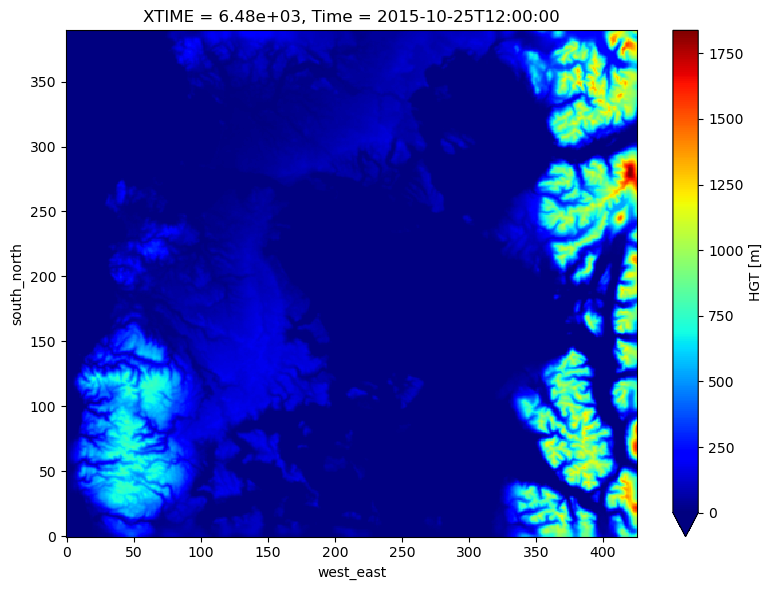

In [7]:
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import getvar


d05_file = Dataset("../../files/wrfout_d05_2015-10-25_12%3A00%3A00")
d05_hgt = getvar(d05_file, "HGT")

fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))

d05_hgt.plot(ax=ax1, cmap="jet", vmin=0)
plt.tight_layout()
plt.show()

In [13]:
hgt_input = np.load(f"../../parches_winscp/bicubic_32_32/190824_16_va/raw/hgt_input_raw_190824_16_va.npy")[:156,:,:,0]
print(hgt_input.shape)

(156, 32, 32)


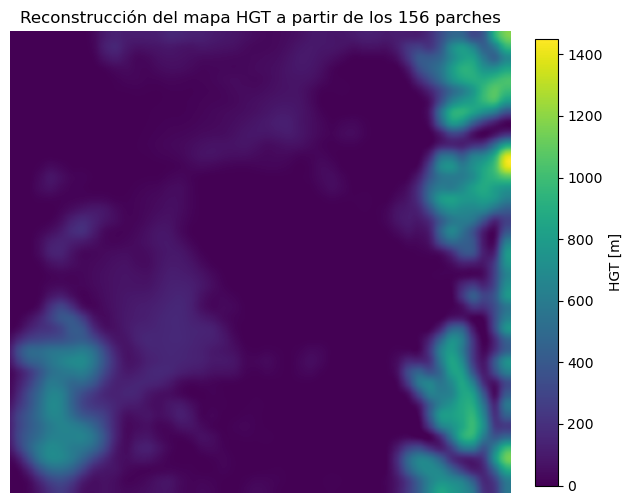

In [30]:
num_rows = 12; num_cols = 13

new_array = np.zeros((num_rows * 32, num_cols * 32))

# Llenar el nuevo array con los parches
for i in range(num_rows):
    for j in range(num_cols):
        # Calcular el índice del parche en el tensor original
        index = i * num_cols + j
        if index < 156:
            # Calcular las posiciones en el nuevo array
            new_array[i*32:(i+1)*32, j*32:(j+1)*32] = hgt_input[index]


plt.figure(figsize=(8, 6))
img = plt.imshow(new_array[::-1], cmap='viridis', vmin=0)
cbar = plt.colorbar(img, fraction=0.036, pad=0.04)
cbar.set_label('HGT [m]', fontsize=10)
plt.title('Reconstrucción del mapa HGT a partir de los 156 parches', fontsize=12)
plt.axis('off')
plt.show()


#### Anexo 2 

In [62]:
import glob

directorio = "../../Datos_test/u10/2022_07_16" # Reemplaza con la ruta correcta de tu directorio
archivos_d03 = glob.glob(os.path.join(directorio, '*d03*.npy'))
archivos_d03 = sorted(archivos_d03)[5:]

datos_u10  = [np.load(archivo)[0] for archivo in archivos_d03]
u10_tensor = np.concatenate(datos_u10, axis=0)

print("min: ", np.min(u10_tensor)) 
print("max: ", np.max(u10_tensor))
print("mediana: ", np.median(u10_tensor))
print("mean: ", np.mean(u10_tensor))
print("std: ", np.std(u10_tensor))
print("var: ", np.var(u10_tensor))

min:  -11.0648365
max:  17.671934
mediana:  3.2661624
mean:  3.436723
std:  3.5537586
var:  12.6292


In [52]:
u10_stats = mostrar_stats("u10")
u10_stats.loc["2022_07_16"]

Estadísticos para la variable u10


min       -11.212531
max        17.731998
mediana     3.276432
mean        3.437231
std         3.544589
var        12.564114
Name: 2022_07_16, dtype: object

In [65]:
directorio = "../../Datos_test/v10/2022_07_16" # Reemplaza con la ruta correcta de tu directorio
archivos_d03 = glob.glob(os.path.join(directorio, '*d03*.npy'))
archivos_d03 = sorted(archivos_d03)[5:]

datos_v10  = [np.load(archivo)[0] for archivo in archivos_d03]
v10_tensor = np.concatenate(datos_v10, axis=0)

print("min: ", np.min(v10_tensor)) 
print("max: ", np.max(v10_tensor))
print("mediana: ", np.median(v10_tensor))
print("mean: ", np.mean(v10_tensor))
print("std: ", np.std(v10_tensor))
print("var: ", np.var(v10_tensor))


min:  -21.635998
max:  14.802278
mediana:  -4.2968626
mean:  -4.5524883
std:  5.2793427
var:  27.871458


In [66]:
v10_stats = mostrar_stats("v10")
v10_stats.loc["2022_07_16"]

Estadísticos para la variable v10


min       -21.635998
max        14.802278
mediana    -4.296863
mean       -4.552488
std         5.279343
var        27.871458
Name: 2022_07_16, dtype: object